In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('ames_housing.csv')

In [50]:
df.head()
df.columns

Index(['Unnamed: 0', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod_Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'First_Flr_SF',
       'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish',
   

# Correlation Coefficient

## Statistical Test

We can use `numpy` to calculate the single correlation coefficient between two continuous variables like `Gr_Liv_Area` and `Sale_Price`.

In [51]:
np.corrcoef(df['Gr_Liv_Area'], df['Sale_Price'])

array([[1.        , 0.70677992],
       [0.70677992, 1.        ]])

However, it might be more intuitive to view our correlations as a heat map instead. We can utilize `seaborn` plots to make more informative visuals of correlation.

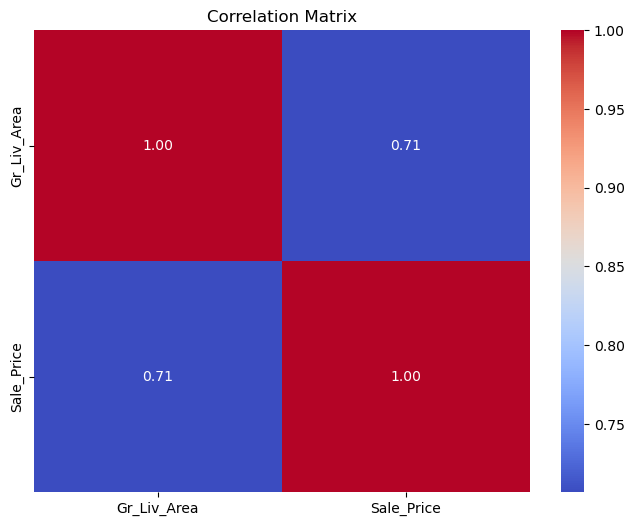

In [52]:
corr_matrix = df[['Gr_Liv_Area', 'Sale_Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Measures of Association

## $\chi^2$ (Chi-Square) Test of Association

Remember, $\chi^2$ test of association compares two **categorical** variables. Let's make a binary response `Bonus` which occurs when `Sale_Price` is over 175,000.

In [53]:
df['Bonus'] = np.where(df['Sale_Price'] > 175_000, 1, 0)

To get the statistic using the `chi2_contingency` function we'll make our contingency table between `Central_Air` and `Bonus`.

In [54]:
contingency_table = pd.crosstab(df['Central_Air'], df['Bonus'])
chi2 = chi2_contingency(contingency_table, correction=True)

print(f'Statistic: {chi2.statistic} :: P-Value: {chi2.pvalue}')

Statistic: 124.75099034277157 :: P-Value: 5.769930262012694e-29


## Cramer's V

In [55]:
cramers = association(pd.crosstab(df['Central_Air'], df['Bonus']), method='cramer')
print(f"Cramer's V: {cramers}")

Cramer's V: 0.20772688280440857


# Visualizing Relationships

## Scatterplots

`seaborn` has a great function called `pairplot` which will allow us to make multiple relationship plots with our target `Sale_Price`.

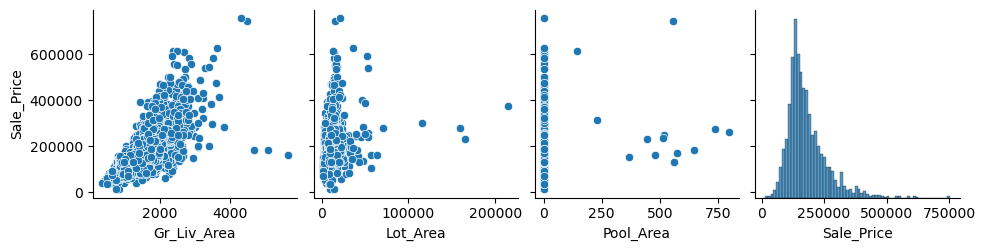

In [56]:
sns.pairplot(df[['Gr_Liv_Area', 'Lot_Area', 'Pool_Area', 'Sale_Price']], y_vars='Sale_Price')

## Boxplots

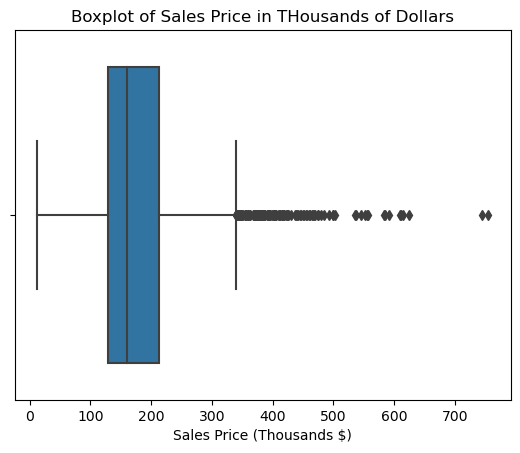

In [57]:
ax = sns.boxplot(df, x=df['Sale_Price'] / 1000)
ax.set(xlabel='Sales Price (Thousands $)', title = 'Boxplot of Sales Price in THousands of Dollars');

# Variance Inflation Factor

We typically look for values greater than 5 for potential indicators of multicollinearity. 

In [58]:
# Subset dataframe for demonstration
subsetted_df = df[['Gr_Liv_Area', 'Lot_Area', 'Pool_Area', 'Central_Air']]

# Reference encode categorical variables for VIF calculation
subsetted_df['Central_Air'] = subsetted_df['Central_Air'].map({'Y': 1, 'N': 0})

# Create a new dataframe to hold the feature names and VIF calculations at i index of the explanatory variables
vif_data = pd.DataFrame()
vif_data['Feature'] = subsetted_df.columns
vif_data['VIF'] = [variance_inflation_factor(subsetted_df.values, i) for i in range(len(subsetted_df.columns))]
vif_data.head()

/var/folders/7s/plv7qn294jg_4c9nxj_69_380000gn/T/ipykernel_5783/2126027699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetted_df['Central_Air'] = subsetted_df['Central_Air'].map({'Y': 1, 'N': 0})


,Feature,VIF
0,Gr_Liv_Area,8.190643
1,Lot_Area,2.881344
2,Pool_Area,1.019811
3,Central_Air,7.126475
